# Question number 2 (Raj Shukla)
### Code and test a two layer feed-forward net of sigmoidal nodes with two input units, ten hidden units and one output unit that learns the concept of a circle in 2D space. The concept is: ⟨x,y⟩is labeled + if (x−a)2 + (y−b)2 < r2 and is labeled − otherwise. Draw all data from the unit square [0,1].
### 2 . Set a = 0.5,b = 0.6,r = 0.4. Generate 100 random samples uniformly distributed on [0,1]2 to train the network using error back-propagation and 100 random samples to test it. Repeat the procedure multiple epochs and with multiple initial weights. Report the changing accuracy and the hyperplanes corresponding to the hidden nodes (when the sigmoid is turned into a step function).

In [40]:
import numpy as np

# sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# define the network architecture
input_size = 2
hidden_size = 10
output_size = 1

# initialize the weights with random values
weights1 = np.random.uniform(size=(input_size, hidden_size))
weights2 = np.random.uniform(size=(hidden_size, output_size))

# define the training parameters
learning_rate = 0.1
num_epochs = 1000
num_samples = 100

# generate training and testing data
a, b, r = 0.5, 0.6, 0.4
train_inputs = np.random.uniform(size=(num_samples, input_size))
train_outputs = np.zeros((num_samples, output_size))
for i in range(num_samples):
    x, y = train_inputs[i]
    if (x - a)**2 + (y - b)**2 < r**2:
        train_outputs[i] = 1

test_inputs = np.random.uniform(size=(num_samples, input_size))
test_outputs = np.zeros((num_samples, output_size))
for i in range(num_samples):
    x, y = test_inputs[i]
    if (x - a)**2 + (y - b)**2 < r**2:
        test_outputs[i] = 1

# train the network using error back-propagation
for epoch in range(num_epochs):
    # forward pass
    hidden_layer = sigmoid(np.dot(train_inputs, weights1))
    output_layer = sigmoid(np.dot(hidden_layer, weights2))

    # compute the error and the delta for the output layer
    error = train_outputs - output_layer
    output_delta = error * sigmoid_derivative(output_layer)

    # compute the delta for the hidden layer
    hidden_delta = output_delta.dot(weights2.T) * sigmoid_derivative(hidden_layer)

    # update the weights
    weights2 += learning_rate * hidden_layer.T.dot(output_delta)
    weights1 += learning_rate * train_inputs.T.dot(hidden_delta)

    # compute the accuracy on the training data
    train_accuracy = np.mean((output_layer > 0.5) == train_outputs)

    # compute the accuracy on the testing data
    hidden_layer_test = sigmoid(np.dot(test_inputs, weights1))
    output_layer_test = sigmoid(np.dot(hidden_layer_test, weights2))
    test_accuracy = np.mean((output_layer_test > 0.5) == test_outputs)

    print(f"Epoch {epoch}: train accuracy = {train_accuracy:.3f}, test accuracy = {test_accuracy:.3f}")

# compute the hyperplanes corresponding to the hidden nodes
for i in range(hidden_size):
    w = weights1[:, i]
    b = -w.dot(np.array([a, b]))
    print(f"Hyperplane {i}: w = {w}, b = {b}")


Epoch 0: train accuracy = 0.530, test accuracy = 0.420
Epoch 1: train accuracy = 0.470, test accuracy = 0.580
Epoch 2: train accuracy = 0.530, test accuracy = 0.420
Epoch 3: train accuracy = 0.470, test accuracy = 0.580
Epoch 4: train accuracy = 0.530, test accuracy = 0.420
Epoch 5: train accuracy = 0.470, test accuracy = 0.580
Epoch 6: train accuracy = 0.530, test accuracy = 0.420
Epoch 7: train accuracy = 0.470, test accuracy = 0.580
Epoch 8: train accuracy = 0.530, test accuracy = 0.420
Epoch 9: train accuracy = 0.470, test accuracy = 0.580
Epoch 10: train accuracy = 0.530, test accuracy = 0.420
Epoch 11: train accuracy = 0.470, test accuracy = 0.580
Epoch 12: train accuracy = 0.530, test accuracy = 0.420
Epoch 13: train accuracy = 0.470, test accuracy = 0.580
Epoch 14: train accuracy = 0.530, test accuracy = 0.420
Epoch 15: train accuracy = 0.470, test accuracy = 0.580
Epoch 16: train accuracy = 0.530, test accuracy = 0.420
Epoch 17: train accuracy = 0.470, test accuracy = 0.580
Ep

Epoch 511: train accuracy = 0.800, test accuracy = 0.780
Epoch 512: train accuracy = 0.800, test accuracy = 0.780
Epoch 513: train accuracy = 0.800, test accuracy = 0.780
Epoch 514: train accuracy = 0.800, test accuracy = 0.780
Epoch 515: train accuracy = 0.800, test accuracy = 0.780
Epoch 516: train accuracy = 0.800, test accuracy = 0.780
Epoch 517: train accuracy = 0.800, test accuracy = 0.780
Epoch 518: train accuracy = 0.800, test accuracy = 0.780
Epoch 519: train accuracy = 0.800, test accuracy = 0.790
Epoch 520: train accuracy = 0.800, test accuracy = 0.790
Epoch 521: train accuracy = 0.800, test accuracy = 0.790
Epoch 522: train accuracy = 0.800, test accuracy = 0.790
Epoch 523: train accuracy = 0.800, test accuracy = 0.790
Epoch 524: train accuracy = 0.800, test accuracy = 0.790
Epoch 525: train accuracy = 0.800, test accuracy = 0.790
Epoch 526: train accuracy = 0.800, test accuracy = 0.790
Epoch 527: train accuracy = 0.800, test accuracy = 0.790
Epoch 528: train accuracy = 0.8

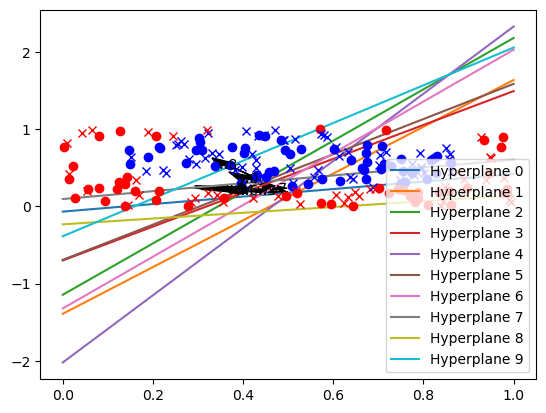

In [41]:
import matplotlib.pyplot as plt

# plot the weight vectors as arrows
for i in range(hidden_size):
    w = weights1[:, i]
    plt.arrow(a, b, w[0]*0.1, w[1]*0.1, head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.text(a + w[0]*0.1, b + w[1]*0.1, f'w{i}', fontsize=10, ha='center', va='center')

# plot the hyperplanes as lines perpendicular to the weight vectors
for i in range(hidden_size):
    w = weights1[:, i]
    b = -w.dot(np.array([a, b]))
    x = np.linspace(0, 1, 100)
    y = (-w[0] * x - b) / w[1]
    plt.plot(x, y, label=f"Hyperplane {i}")

# plot the training data points
for i in range(num_samples):
    x, y = train_inputs[i]
    if train_outputs[i] == 1:
        plt.plot(x, y, 'bo')
    else:
        plt.plot(x, y, 'ro')

# plot the testing data points
for i in range(num_samples):
    x, y = test_inputs[i]
    if test_outputs[i] == 1:
        plt.plot(x, y, 'bx')
    else:
        plt.plot(x, y, 'rx')

plt.legend()
plt.show()

## Alternative Solution

In [29]:
import numpy as np

In [30]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def step(x):
    return np.heaviside(x, 0.5)

In [31]:
# Set the parameters of the problem
a = 0.5
b = 0.6
r = 0.4

In [32]:
# Generate the training and testing data
np.random.seed(0)
train_data = np.random.rand(100, 2)
train_labels = np.array([1 if (x-a)**2 + (y-b)**2 < r**2 else 0 for x, y in train_data]).reshape(-1, 1)
test_data = np.random.rand(100, 2)
test_labels = np.array([1 if (x-a)**2 + (y-b)**2 < r**2 else 0 for x, y in test_data]).reshape(-1, 1)


In [33]:
# Initialize the weights randomly
np.random.seed(1)
W1 = np.random.randn(2, 10)
b1 = np.zeros((1, 10))
W2 = np.random.randn(10, 1)
b2 = np.zeros((1, 1))

In [34]:
# Set the learning rate and the number of epochs
learning_rate = 0.1
num_epochs = 1000

In [35]:
# Train the network using error back-propagation
for epoch in range(num_epochs):
    # Forward pass
    Z1 = np.dot(train_data, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    Y_hat = sigmoid(Z2)
    
    # Compute the loss and the gradients
    error = train_labels - Y_hat
    dZ2 = error * sigmoid_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(Z1)
    dW1 = np.dot(train_data.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    
    # Update the weights
    W2 += learning_rate * dW2
    b2 += learning_rate * db2
    W1 += learning_rate * dW1
    b1 += learning_rate * db1
    
    # Compute the accuracy on the training and testing data
    train_accuracy = np.mean(np.round(Y_hat) == train_labels)
    Z1_test = np.dot(test_data, W1) + b1
    A1_test = sigmoid(Z1_test)
    Z2_test = np.dot(A1_test, W2) + b2
    Y_hat_test = sigmoid(Z2_test)
    test_accuracy = np.mean(np.round(Y_hat_test) == test_labels)
    
    # Print the progress
    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}: train accuracy={train_accuracy:.3f}, test accuracy={test_accuracy:.3f}")

Epoch 100/1000: train accuracy=0.720, test accuracy=0.660
Epoch 200/1000: train accuracy=0.760, test accuracy=0.720
Epoch 300/1000: train accuracy=0.820, test accuracy=0.830
Epoch 400/1000: train accuracy=0.840, test accuracy=0.800
Epoch 500/1000: train accuracy=0.850, test accuracy=0.830
Epoch 600/1000: train accuracy=0.920, test accuracy=0.890
Epoch 700/1000: train accuracy=0.950, test accuracy=0.960
Epoch 800/1000: train accuracy=0.950, test accuracy=0.980
Epoch 900/1000: train accuracy=0.960, test accuracy=0.980
Epoch 1000/1000: train accuracy=0.970, test accuracy=0.980


In [36]:
# Compute the hyperplanes corresponding to the hidden nodes
H = sigmoid(np.dot(test_data, W1) + b1)
H_step = step

IndexError: index 2 is out of bounds for axis 0 with size 2

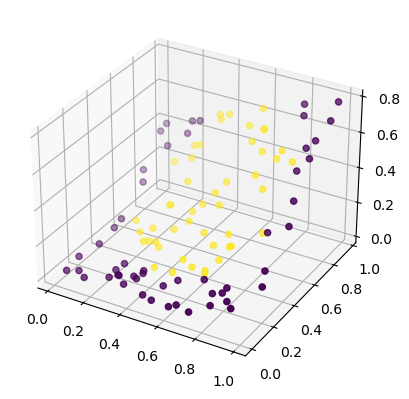

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot the hyperplanes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_data[:, 0], test_data[:, 1], H[:, 0], c=test_labels[:, 0])
for i in range(11):
    xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
    zz = (-(W1[0, i]*xx + W1[1, i]*yy + b1[0, i]) / W1[2, i]).clip(0, 1)
    ax.plot_surface(xx, yy, zz, alpha=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()